In [1]:
import numpy as np
import pandas as pd
# For Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
def warns(*args,**kwargs): pass
warnings.warn=warns

In [2]:
df = pd.read_csv('/content/water_quality_.csv')
df.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
4313,7.026015,129.836114,165.925929,1.460896,21.320870,1.625439,0.108653,1.783611,0.0
4898,7.462927,70.559524,124.741298,0.728064,14.506234,1.094848,0.082574,0.752532,1.0
1610,7.024511,58.023131,115.708103,0.649225,11.815080,1.420846,0.090967,0.541173,1.0
3353,7.085435,149.397618,184.682476,1.151300,23.728137,1.550057,0.136162,1.514042,0.0
163,7.466655,57.348135,143.218313,0.870819,17.873258,1.375008,0.063042,0.631849,1.0
3876,7.460143,104.332870,170.424388,1.076311,21.677207,1.764145,0.149942,1.945722,0.0
4778,7.389613,113.803596,187.726750,1.133948,26.583896,1.893859,0.143178,1.156537,0.0
2299,7.115092,134.209887,178.925058,1.130251,24.075033,1.921628,0.117358,1.263253,0.0
77,6.651058,91.728590,135.361416,0.876833,14.014435,1.374055,0.067982,0.899425,1.0
3529,7.394479,136.614713,174.563163,1.056684,27.627544,1.849849,0.100221,1.659715,0.0


In [3]:
selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon','Trihalomethanes', 'Turbidity']
selected_features

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [4]:
for x in selected_features:
    # Finding the IQR
    percentile25 = df[x].quantile(0.25)
    percentile75 = df[x].quantile(0.75)
    iqr = percentile75 - percentile25

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    # Capping the outliers

    df[x] = np.where(
        df[x] > upper_limit,
        upper_limit,
        np.where(
            df[x] < lower_limit,
            lower_limit,
            df[x]
        )
    )

In [5]:
from sklearn.preprocessing import PowerTransformer

# Select numeric columns from  DataFrame
numeric_columns = df.drop(columns='Check')

# Create a PowerTransformer object using the Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the numeric columns using the Yeo-Johnson transformation
transformed_data = pt.fit_transform(numeric_columns)

# Replace the original numeric columns with the transformed data
df[numeric_columns.columns] = transformed_data

In [6]:
df.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
336,0.319930,-1.766508,-1.508250,-0.136840,-0.164180,-0.164904,-1.625727,-0.335175,1.0
1082,1.464716,-1.449603,-1.573540,0.006400,-1.611355,-0.988154,-1.018872,-0.780452,1.0
354,0.263706,-0.590792,-0.815551,-1.450203,-1.281594,-1.134996,-0.830713,-0.424992,1.0
304,-0.223621,0.512703,1.604476,1.190730,0.789303,0.547574,0.711138,1.302868,0.0
932,-1.370423,-1.629324,-0.555089,-0.676703,-1.411143,-1.166611,-0.717157,-1.334492,1.0
2193,-1.632953,-0.205658,-1.301149,-1.066788,-0.001016,-0.290621,-1.701225,-0.380795,1.0
2794,0.162158,1.454209,1.554568,0.495273,0.939651,1.516088,1.277071,1.199773,0.0
3336,0.413618,0.763344,0.781429,1.334163,0.479477,0.186316,1.109613,0.953214,0.0
2380,-0.006783,-0.515656,-0.880569,-1.152507,-0.102784,-0.831896,-0.741523,-1.207460,1.0
4173,0.573362,0.833710,0.721210,0.216015,0.073732,1.489711,0.182766,1.287595,0.0


In [7]:
X = df.drop(columns=['Check'])
y = df['Check']

In [8]:
X.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity
1596,0.938434,0.935409,0.902627,1.068347,1.546018,0.669870,0.223094,0.965700
3492,1.131522,1.127607,0.600250,1.493566,0.142783,1.235667,1.160547,1.227280
2270,1.690099,1.075487,1.659029,1.088955,1.619274,1.573570,0.278549,1.083553
4379,0.848343,1.521102,1.181698,1.178844,1.363905,1.337599,0.399822,0.339091
3919,1.511520,1.057754,0.159945,0.938439,1.176688,1.029531,1.134421,1.595349
3263,1.025820,0.110388,1.335884,0.083647,0.166121,0.612438,0.898136,0.581533
3176,-1.045970,-1.388080,-1.214942,-1.385206,-1.244282,-0.696067,-1.459112,-1.728139
3912,-0.494688,1.502995,0.421135,0.920781,1.505148,0.558147,0.439612,1.091911
4905,0.567002,0.509096,0.789009,0.138526,1.582605,1.481552,1.653310,0.401518
1414,0.934934,1.225931,1.442941,1.583584,1.030173,1.660527,0.788231,1.371055


In [9]:
y.sample(10)

,Check
2813,1.0
891,0.0
683,1.0
3895,0.0
65,0.0
732,1.0
4276,0.0
4441,0.0
2464,1.0
705,0.0


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

In [2]:
pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


In [12]:
import kerastuner as kt

In [13]:
def BuildModel(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        if counter == 0:
            # First layer: Include input_dim for the first layer
            model.add(Dense(hp.Int('units'+str(i), min_value=8, max_value=128, step=8),
                            activation=None,  # Set activation to None for now
                            input_dim=X_train.shape[1]))

            # Batch Normalization as a tunable option
            if hp.Boolean('batch_norm'+str(i)):
                model.add(BatchNormalization())

            # Now apply the activation function
            model.add(Activation(hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid'])))

            # Dropout
            model.add(Dropout(hp.Choice('dropout'+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        else:
            # Subsequent layers
            model.add(Dense(hp.Int('units'+str(i), min_value=8, max_value=128, step=8), activation=None))

            # Batch Normalization as a tunable option
            if hp.Boolean('batch_norm'+str(i)):
                model.add(BatchNormalization())

            # Apply the activation function
            model.add(Activation(hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid'])))

            # Dropout
            model.add(Dropout(hp.Choice('dropout'+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

        counter += 1

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with a tunable optimizer
    model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd', 'nadam', 'adadelta']),
                  loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [14]:
from tensorflow.keras.callbacks import EarlyStopping
# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',       # Metric to monitor
    patience=5,               # Number of epochs to wait for improvement
    restore_best_weights=True # Restore the model weights from the epoch with the best value of the monitored metric
)

In [15]:
tuner = kt.RandomSearch(BuildModel,objective='val_accuracy',max_trials=50,directory='mydir',project_name='final')

In [16]:
tuner.search(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stopping])

Trial 50 Complete [00h 00m 06s]
val_accuracy: 0.9993333220481873

Best val_accuracy So Far: 0.9993333220481873
Total elapsed time: 00h 13m 48s


In [25]:
# Retrieve the Best Hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hyperparameters.values)

Best Hyperparameters:
{'num_layers': 7, 'units0': 32, 'batch_norm0': True, 'activation0': 'tanh', 'dropout0': 0.7, 'optimizer': 'rmsprop', 'units1': 80, 'batch_norm1': True, 'activation1': 'relu', 'dropout1': 0.8, 'units2': 16, 'batch_norm2': False, 'activation2': 'sigmoid', 'dropout2': 0.1, 'units3': 48, 'batch_norm3': False, 'activation3': 'sigmoid', 'dropout3': 0.2, 'units4': 104, 'batch_norm4': False, 'activation4': 'relu', 'dropout4': 0.5, 'units5': 128, 'batch_norm5': True, 'activation5': 'relu', 'dropout5': 0.3, 'units6': 96, 'batch_norm6': False, 'activation6': 'relu', 'dropout6': 0.5}


In [34]:
# Get the Best Model
best_model = tuner.get_best_models(num_models=1)[0]

# Use the Best Model
# evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Best Model Test Loss: {test_loss}")
print(f"Best Model Test Accuracy: {test_accuracy}")

47/47 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.9993
Best Model Test Loss: 0.2859177589416504
Best Model Test Accuracy: 0.9993333220481873


In [26]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 80)                2640      
                                                                 
 batch_normalization_1 (Bat  (None, 80)                320       
 chNormalization)                                       

In [3]:
!apt-get install graphviz -y
!pip install pydot
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 741.4 kB/s eta 0:00:00


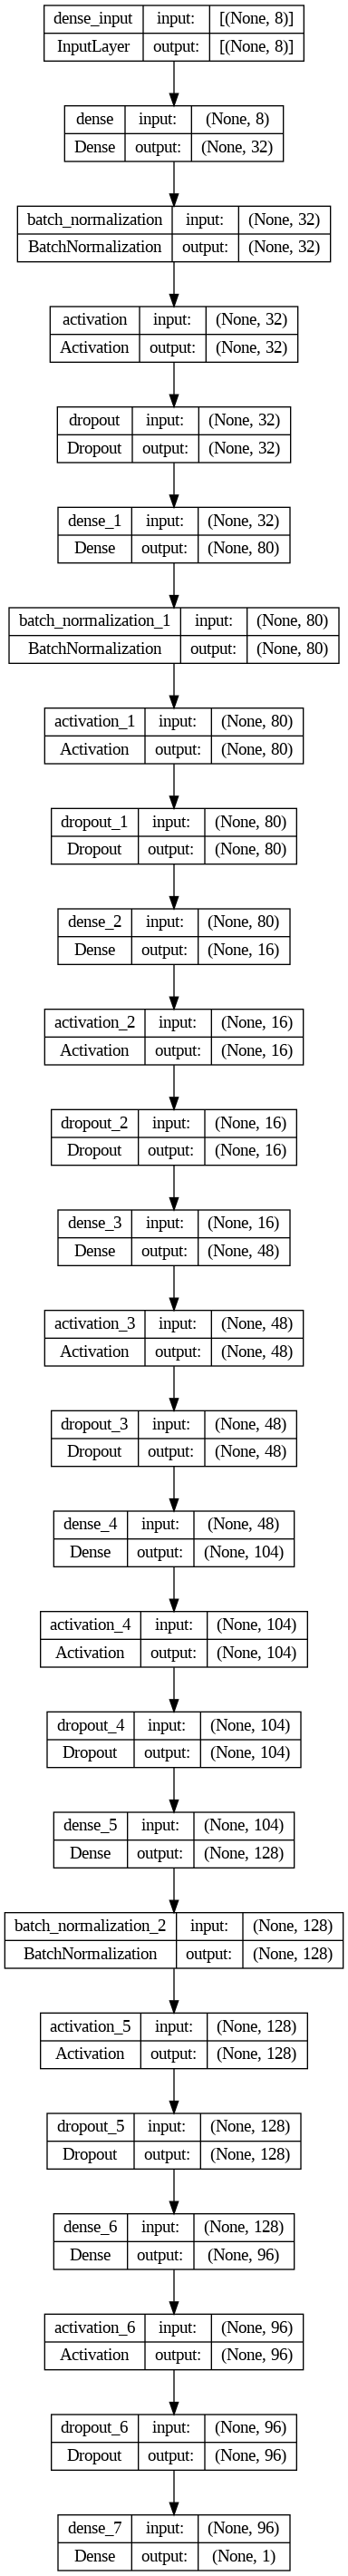

In [27]:
from tensorflow.keras.utils import plot_model

# Assuming you have already defined and compiled your model
plot_model(best_model, to_file='model.png', show_shapes=True, show_layer_names=True)

# To display the image in Colab:
from IPython.display import Image
Image('model.png')


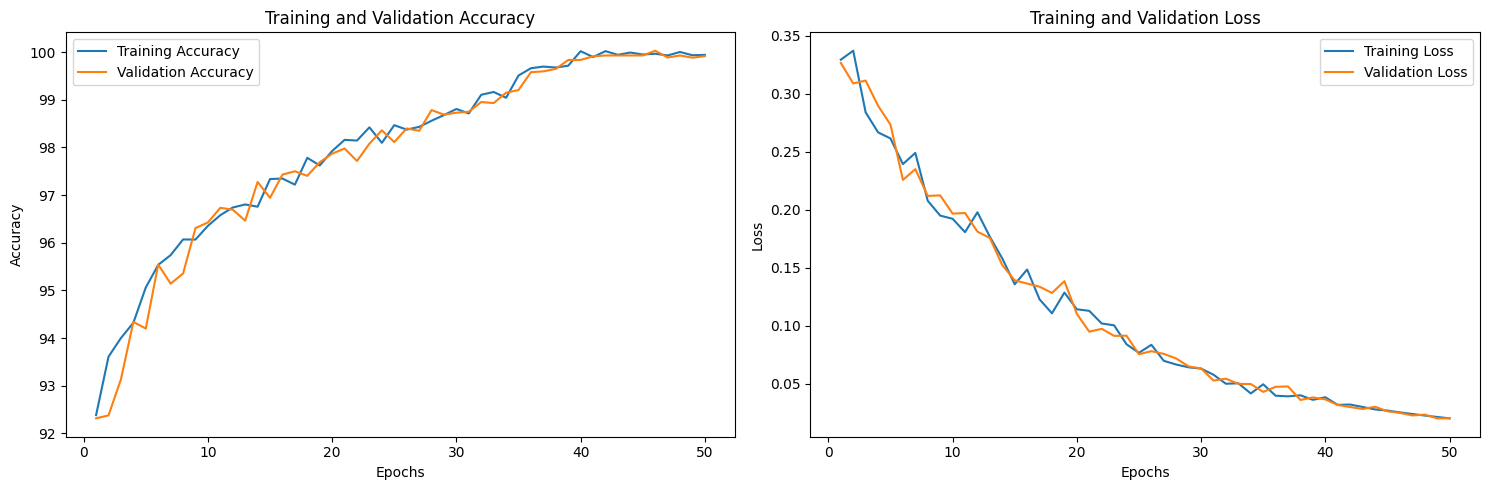

In [135]:
# Check if history is not None and extract metrics
history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
if history is not None:
    history_dict = history.history

    # Extract accuracy and loss values
    acc = history_dict.get('accuracy', [])
    val_acc = history_dict.get('val_accuracy', [])
    loss = history_dict.get('loss', [])
    val_loss = history_dict.get('val_loss', [])

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [30]:
from tensorflow.keras.models import Model

# Get the total number of layers in the best_model
total_layers = len(best_model.layers)

# Define the index of the last hidden layer
# Since the last layer is the output layer, we use total_layers - 2
last_hidden_layer_index = total_layers - 2

# Define the feature extractor using Model class
feature_extractor = Model(inputs=best_model.input, outputs=best_model.layers[last_hidden_layer_index].output)

# Extract features from the training and test data
X_train_nn_features = feature_extractor.predict(X_train)
X_test_nn_features = feature_extractor.predict(X_test)

47/47 [==============================] - 0s 2ms/step


In [31]:
# Train and evaluate the ML model on the features extracted by Neural Network model

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

# Define the base models
base_models = [
    ('logistic', LogisticRegression(penalty='l2')),
    ('svm', SVC(kernel='linear', probability=True)),  # probability=True for compatibility
    ('naive_bayes', GaussianNB())
]

# Define the meta-model (KNN)
meta_model = KNeighborsClassifier(n_neighbors=15)

# Create the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
stacking_clf.fit(X_train_nn_features, y_train)

StackingClassifier(estimators=[('logistic', LogisticRegression()),
                               ('svm', SVC(kernel='linear', probability=True)),
                               ('naive_bayes', GaussianNB())],
                   final_estimator=KNeighborsClassifier(n_neighbors=15))

Hybrid Model Accuracy on Train Data: 99.97%
Hybrid Model Precision on Training Data: 99.94 %
Hybrid Model Recall on Training Data: 100.00 %
Hybrid Model F1 score on Training Data: 99.97 %


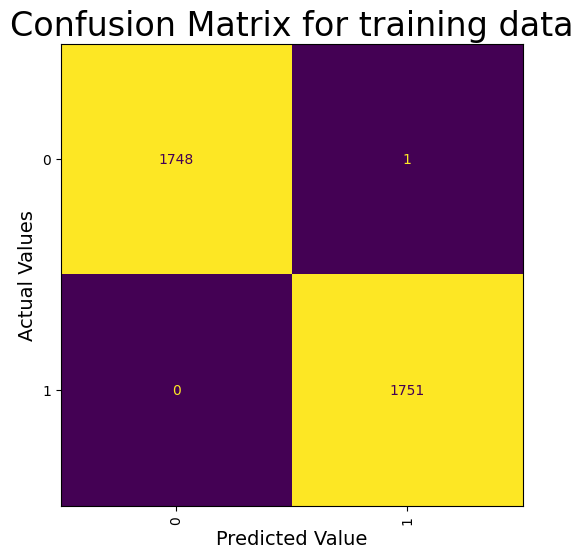

In [32]:
# Accuray On Training Data
stack_predict_train = stacking_clf.predict(X_train_nn_features)
stack_accuracy_train = accuracy_score(y_train, stack_predict_train)
print(f"Hybrid Model Accuracy on Train Data: {stack_accuracy_train * 100:.2f}%")
print("Hybrid Model Precision on Training Data: {:.2f} %".format(precision_score( y_train,stack_predict_train) * 100) )
print("Hybrid Model Recall on Training Data: {:.2f} %".format(recall_score( y_train,stack_predict_train) * 100) )
print("Hybrid Model F1 score on Training Data: {:.2f} %".format(f1_score(y_train,stack_predict_train)*100))

# Visualising Confusion Matrix
cm = confusion_matrix(y_train, stack_predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots( figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

Hybrid Model Accuracy on Test Data: 99.93 %
Hybrid Model Precision on Test Data: 99.87 %
Hybrid Model Recall on Test Data: 100.00 %
Hybrid Model F1 score on Test Data: 99.93 %


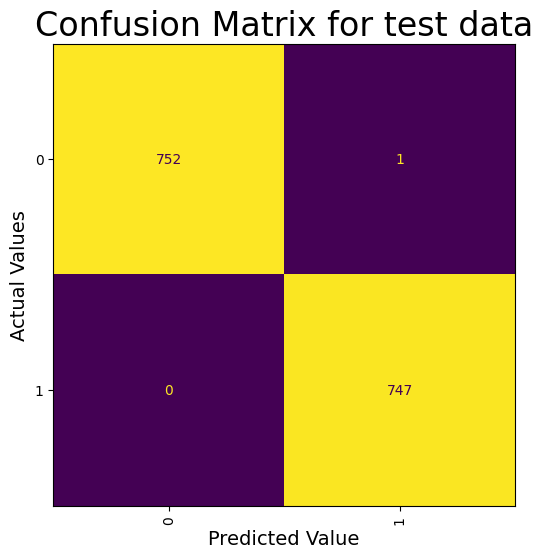

In [33]:
# Accuray On Test Data
stack_predict_test = stacking_clf.predict(X_test_nn_features)
stack_accuracy = accuracy_score(y_test,stack_predict_test)

print("Hybrid Model Accuracy on Test Data: {:.2f} %".format(stack_accuracy * 100))

# Precision on Testing Dataset
stack_precision = precision_score(y_test,stack_predict_test)
print("Hybrid Model Precision on Test Data: {:.2f} %".format(stack_precision * 100))

# Recall on Testing Dataset
stack_recall = recall_score(y_test,stack_predict_test)
print("Hybrid Model Recall on Test Data: {:.2f} %".format(stack_recall * 100))

# F1 score
stack_f1 = f1_score(y_test,stack_predict_test)
print("Hybrid Model F1 score on Test Data: {:.2f} %".format(stack_f1 * 100))


# Visualising Confusion Matrix
cm = confusion_matrix(y_test,stack_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots( figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for test data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()
